In [3]:
pip install census

Note: you may need to restart the kernel to use updated packages.


In [1]:
from census import Census

import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt


In [2]:
gender_df = pd.read_csv('data_by_year.csv')
gender_df.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


In [3]:
artist_df = pd.read_csv('data.csv')
artist_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [4]:
year_df = artist_df.loc[(artist_df['year'] == 2021) | (artist_df['year'] == 2020) | (artist_df['year'] == 2019) | (artist_df['year'] == 2018)]

In [5]:
grouped_df = year_df.groupby(['year'])['id'].count()

In [6]:
grouped_df

year
2018    2714
2019    2329
2020    4294
2021    1840
Name: id, dtype: int64

<AxesSubplot:xlabel='year'>

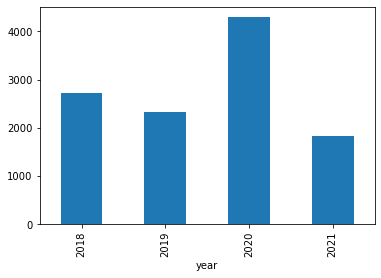

In [7]:
grouped_df.plot(kind='bar',x='year')

In [8]:
year2001to2002_df =  artist_df.loc[(artist_df['year'] >=2001) &(artist_df['year'] <=2002)]

In [15]:
year2001to2002_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
15877,0.000817,['Godhead'],0.580,258867,0.843,0,6DGK3Kp1lpYZzsfuZJ7ZlL,0.573000,2,0.074,-6.602,1,Penetrate,38,2001-01-01,0.0866,149.639,0.3760,2001
15889,0.003050,['Godhead'],0.597,239760,0.655,0,5UPZmTuQtCF9lKpuyEO8hQ,0.075700,11,0.110,-7.859,0,The Reckoning,32,2001-01-01,0.0677,122.559,0.0674,2001
15891,0.868000,['Judy Garland'],0.197,286067,0.224,0,6lzXmBxWgzUbBX90IqzAjO,0.000000,0,0.809,-13.690,1,The Man That Got Away - Live At Carnegie Hall/...,28,2002-01-01,0.0411,181.128,0.1190,2002
15907,0.024200,['Selena'],0.779,214827,0.821,0,0w8tpdBoygRtPBYJwd77Uo,0.000009,0,0.169,-7.615,1,No Quiero Saber - 2000 Mix,19,2002-08-01,0.0414,119.618,0.8750,2002
15909,0.000328,['Godhead'],0.517,241800,0.907,0,0AueyG7H7mDo9GPNV6zlE2,0.640000,9,0.246,-4.384,1,Eleanor Rigby,22,2001-01-01,0.0907,129.627,0.2640,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170584,0.023500,['Mac Dre'],0.841,244293,0.645,1,0sTZbHpkxrgTkOFWPxahlg,0.000000,2,0.297,-7.241,1,Thizzelle Dance,34,2002-01-01,0.4110,94.942,0.6080,2002
170585,0.491000,['VeggieTales'],0.816,166400,0.541,0,1srbr3Qqn2u7dn8W64F2uK,0.000000,5,0.169,-6.808,0,"Jonah Was A Prophet - From ""Jonah: A VeggieTal...",36,2002-01-01,0.1730,109.206,0.4820,2002
170586,0.322000,['Tropicalísimo Apache'],0.613,1198067,0.733,0,2ibmiOuZDmd84Lu6xvyGoC,0.000003,0,0.505,-6.332,1,Apache Mix,44,2002-01-01,0.0707,115.853,0.8630,2002
170587,0.137000,['Hank Williams III'],0.656,206602,0.879,0,4HJusmphJxeodZV1vJbrvI,0.000026,4,0.250,-7.205,0,"7 Months, 39 Days",36,2002-01-29,0.0547,99.799,0.8230,2002


In [16]:
grouped2001_df = year2001to2002_df.groupby(['year'])['id'].count()

In [17]:
grouped2001_df

year
2001     981
2002    2055
Name: id, dtype: int64

<AxesSubplot:xlabel='year'>

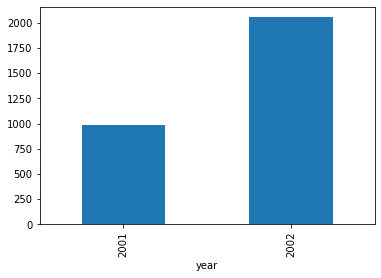

In [18]:
grouped2001_df.plot(kind='bar', x='year')